<a href="https://colab.research.google.com/github/ffilipa26/Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer
nlp = spacy.load("en_core_web_sm")
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
import concurrent.futures
from nltk import word_tokenize, pos_tag
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Datasets

In [6]:
df = pd.read_csv('/content/drive/My Drive/Capstone/Data/Raw/amazon_fine_food_reviews.csv')

In [7]:
df_processed = pd.read_csv('/content/drive/My Drive/Capstone/Data/Processed/processed_data.csv')

In [8]:
df_preprocessed = pd.read_csv('/content/drive/My Drive/preprocessed_data.csv')

In [9]:
genuine_df = pd.read_csv('/content/drive/My Drive/genuine_df.csv')

In [32]:
fake_df = pd.read_csv('/content/drive/My Drive/fake_df.csv')

In [7]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [8]:
df_processed.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
ProcessedText             object
Review_Length              int64
dtype: object

In [18]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [19]:
df_processed.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide ...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,i got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,this saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",this taffy is so good it is very soft and chew...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now i m mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,this is a very healthy dog food good for their...


In [20]:
df.shape

(568454, 10)

In [21]:
df_processed.shape

(568411, 10)

In [22]:
len(df)-len(df_processed)

43

Here we can observe that there is no difference in number of columns, meaning that there is no completely NaN column to remove or any useless column, whereas the difference in lenghtis of 43. We have now to study if that difference is only due the presence of null values.

# Cleaning and Processing Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Here we can observe that in two columns, ProfileName and Summary, we have null values.

In [23]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


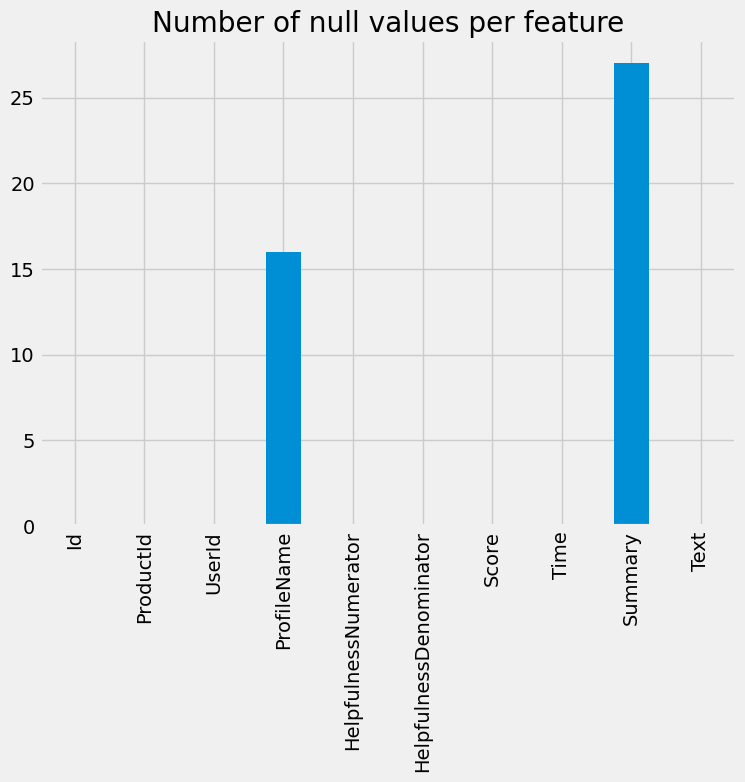

In [25]:
# Count the missing values in each column (16+27 = exactly 43 values)
print((df.isnull().sum()))

df.isnull().sum().plot(kind='bar');
plt.title('Number of null values per feature');

In [ ]:
df = df.dropna()

In [ ]:
len(df)

568411

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568406,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568407,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568408,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568409,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568410,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [ ]:
df_processed.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568406,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great for sesame chicken this is a good if not...
568407,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,i m disappointed with the flavor the chocolate...
568408,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,these stars are small so you can give of those...
568409,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,these are the best treats for training and rew...
568410,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,i am very satisfied product is as advertised i...


We removed the null values and than checked if our dataset was equal to the processed one, but apparentely it is not.

In [ ]:
df_processed == df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...
568406,True,True,True,True,True,True,True,True,True,False
568407,True,True,True,True,True,True,True,True,True,False
568408,True,True,True,True,True,True,True,True,True,False
568409,True,True,True,True,True,True,True,True,True,False


In [ ]:
df.Text[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
df_processed.Text[0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most '

As we can observe, the text has been processed throughout lowercasing it and removing punctuation. We will be doing that seprately when preprocessing text for sentiment analysis.

## Deduplicate Data

Our assumptions will be that if the same ID leaves the same review on the same product, it will be a duplicate. We won't be removing reviews from same IDs with different texts (even though the score may be the same) assuming that they left the review in a different time span.

In [ ]:
df = df.drop_duplicates(subset=['UserId', 'ProductId', 'Text'])

In [ ]:
len(df)

567102

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
567097,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
567098,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
567099,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
567100,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
567101,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


# Exploring Data

## Other Plots

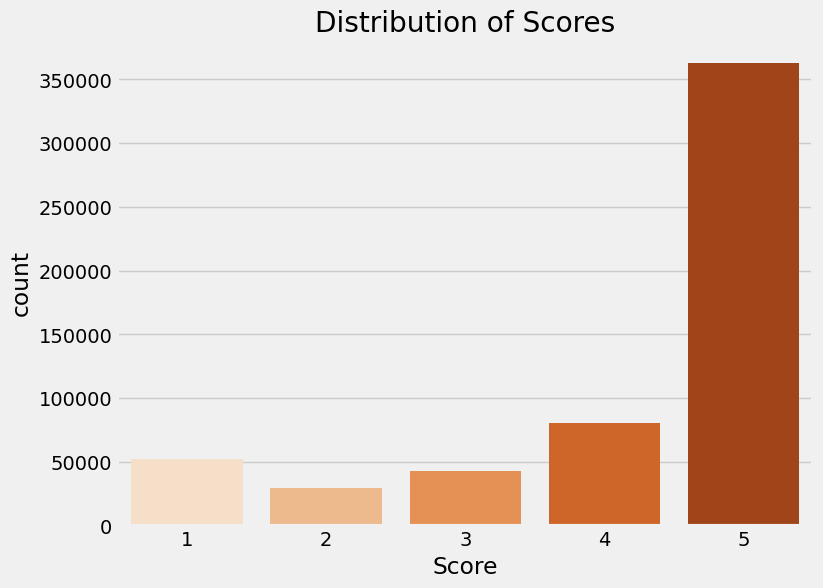

In [10]:
# Distribution of Scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df, palette = 'Oranges')
plt.title('Distribution of Scores')
plt.show()

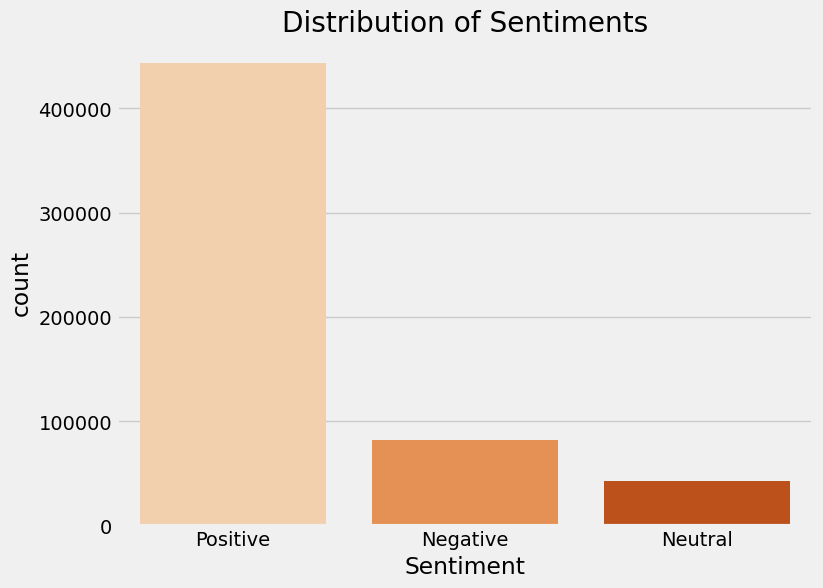

In [16]:
df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x > 3 else 'Neutral' if x == 3 else 'Negative')
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette = 'Oranges')
plt.title('Distribution of Sentiments')
plt.show()

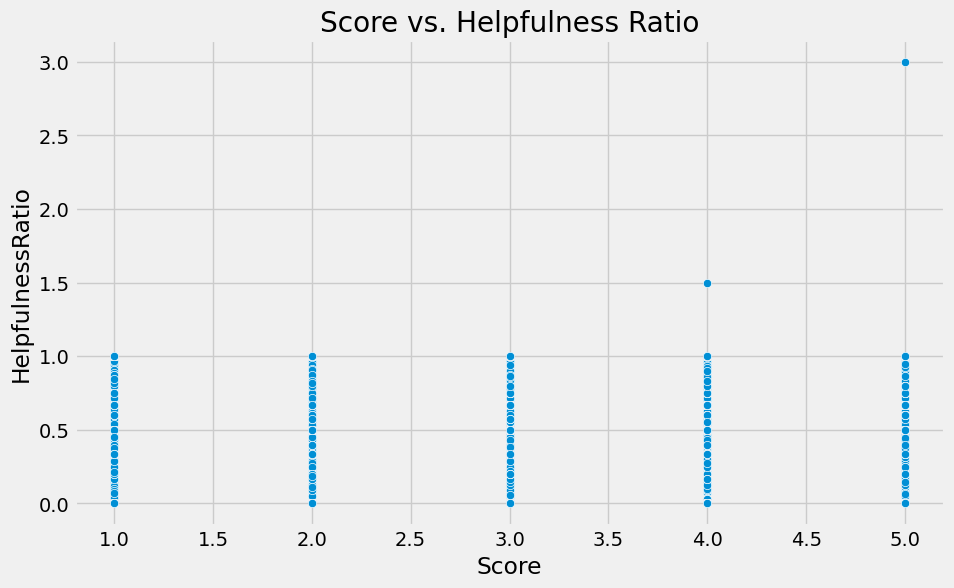

In [20]:
# Score vs. Helpfulness
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='HelpfulnessRatio', data=df, palette = 'Oranges')
plt.title('Score vs. Helpfulness Ratio')
plt.show()

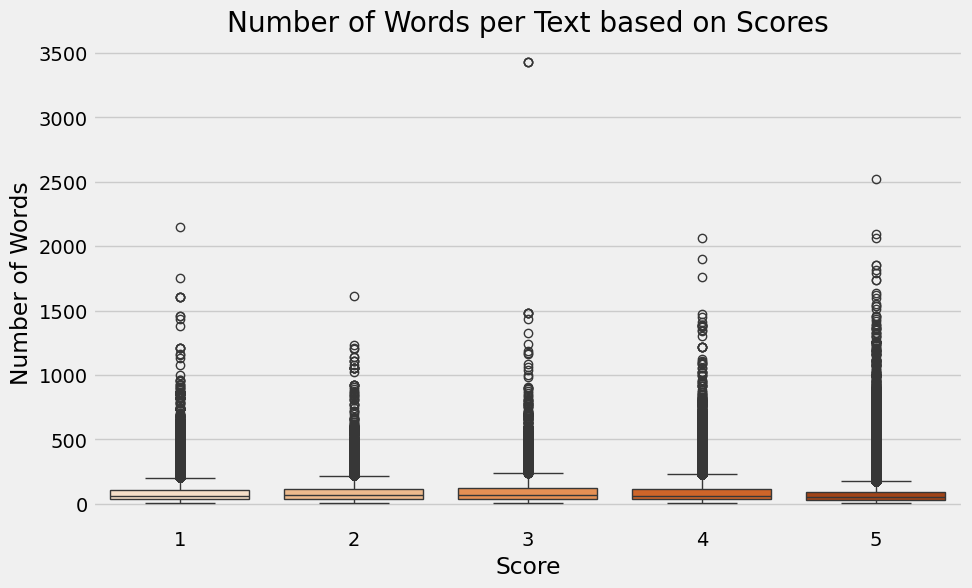

In [25]:
# Calculate the number of words in each text
df['Word_Count'] = df['Text'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts based on scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Word_Count', data=df, palette='Oranges')
plt.title('Number of Words per Text based on Scores')
plt.xlabel('Score')
plt.ylabel('Number of Words')
plt.show()


## Word Clouds

In [11]:
# Separate reviews into positive and negative based on scores
positive_reviews = ' '.join(df[df['Score'] > 3]['Text'])
negative_reviews = ' '.join(df[df['Score'] < 3]['Text'])

In [41]:
# Define function to filter words based on parts of speech
def filter_words_by_pos(text, allowed_pos):
    tokens = word_tokenize(text)
    with concurrent.futures.ProcessPoolExecutor() as executor:
        tagged_words = list(executor.map(pos_tag, [tokens]))
    filtered_words = [word for word, pos in tagged_words[0] if pos in allowed_pos]
    return ' '.join(filtered_words)


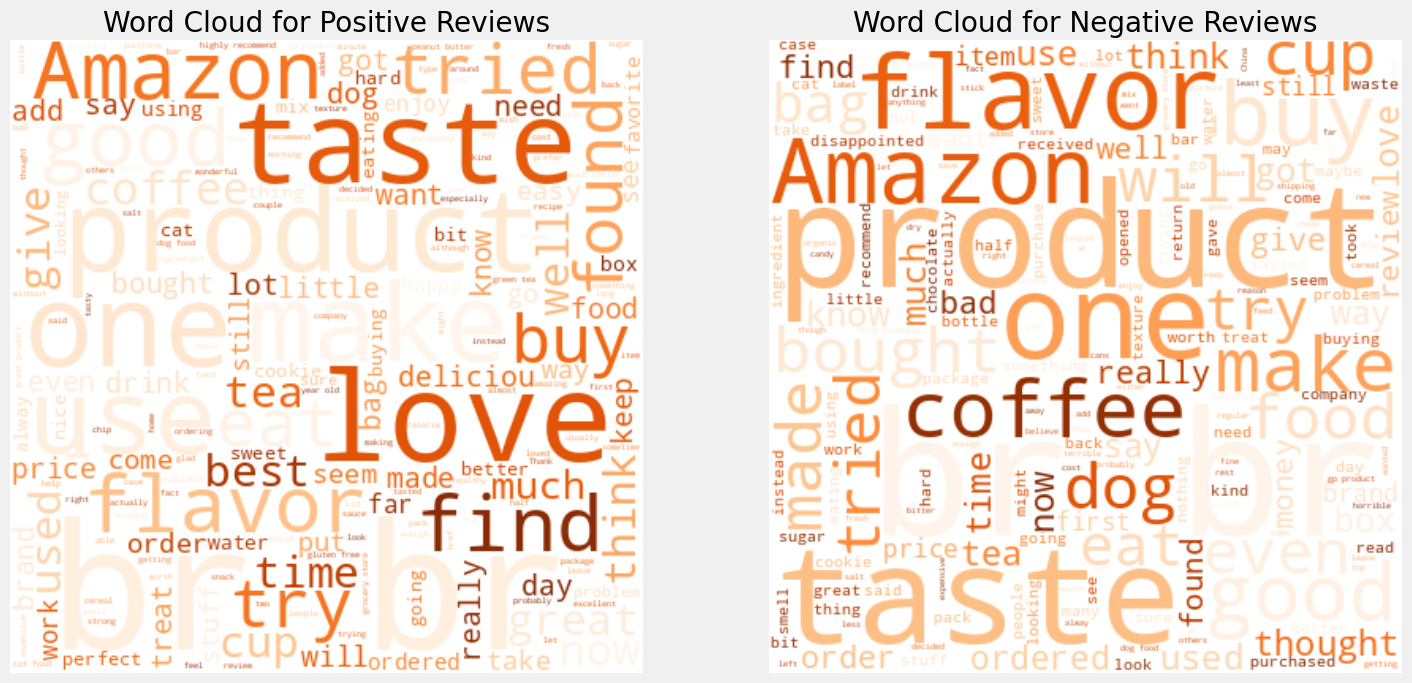

In [40]:
# Word Cloud for Positive and Negative Reviews
positive_reviews = ' '.join(df[df['Score'] >= 4]['Text'].dropna())
negative_reviews = ' '.join(df[df['Score'] <= 2]['Text'].dropna())

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=400, height=400, background_color='white', colormap='Oranges').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=400, height=400, background_color='white', colormap='Oranges').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

## Detecting Outliers and Fake Reviews

Here we are studying the average number of reviews per user and the average score in: (i) the case the user only make a review, it will tend to be more "extreme"; (ii) the case the user will make more than a review, it will be more on average

In [ ]:
reviews_per_user = df.groupby('UserId')['ProductId'].count()

In [ ]:
reviews_per_user

UserId
#oc-R103C0QSV1DF5E    1
#oc-R109MU5OBBZ59U    1
#oc-R10LFEMQEW6QGZ    1
#oc-R10LT57ZGIB140    1
#oc-R10UA029WVWIUI    1
                     ..
AZZV9PDNMCOZW         3
AZZVNIMTTMJH6         1
AZZY649VYAHQS         1
AZZYCJOJLUDYR         1
AZZZOVIBXHGDR         1
Name: ProductId, Length: 256047, dtype: int64

In [ ]:
score_per_user = df.groupby('UserId')['Score'].mean()

In [ ]:
users_avg = pd.DataFrame([reviews_per_user, score_per_user])

In [ ]:
users_avg = users_avg.transpose()

In [ ]:
users_avg = users_avg.rename(columns = {'ProductId':'ReviewCount'})

In [ ]:
users_avg

,ReviewCount,Score
UserId,,
#oc-R103C0QSV1DF5E,1.0,5.000000
#oc-R109MU5OBBZ59U,1.0,5.000000
#oc-R10LFEMQEW6QGZ,1.0,5.000000
#oc-R10LT57ZGIB140,1.0,3.000000
#oc-R10UA029WVWIUI,1.0,1.000000
...,...,...
AZZV9PDNMCOZW,3.0,4.666667
AZZVNIMTTMJH6,1.0,5.000000
AZZY649VYAHQS,1.0,5.000000


In [ ]:
rated1 = users_avg[users_avg.Score==1].reset_index()
rated2 = users_avg[users_avg.Score==2].reset_index()
rated3 = users_avg[users_avg.Score==3].reset_index()
rated4 = users_avg[users_avg.Score==4].reset_index()
rated5 = users_avg[users_avg.Score==5].reset_index()

In [ ]:
rated1.describe()['ReviewCount']

count    24297.000000
mean         1.486768
std          1.597300
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         42.000000
Name: ReviewCount, dtype: float64

<Axes: >

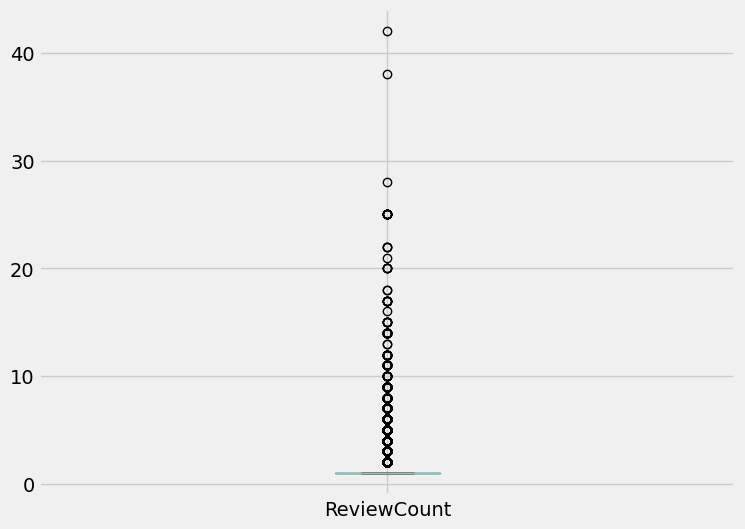

In [ ]:
rated1[['ReviewCount','UserId']].boxplot()

We can observe an outlier in the class with people who assign score 1. Let's study better this individual.

In [ ]:
rated1[rated1.ReviewCount == 42]

,UserId,ReviewCount,Score
16164,A3IE3TQ79W0YOR,42.0,1.0


The user detected is A3TVZM3ZIXG8YW, Mr Christopher Hayes. If we observe the reviews he gave in the whole dataset:

In [ ]:
len(df[df['UserId']=='A3IE3TQ79W0YOR'])

42

In [ ]:
df[df['UserId']=='A3IE3TQ79W0YOR'].groupby('ProductId')['Id'].count()

ProductId
B000084DWM    2
B000261MX6    1
B0002MLA5K    2
B000634174    1
B00063425K    1
B0006345PW    2
B000QSN7P6    2
B001VIY8BW    2
B001VIYCK4    2
B003ANFMY8    2
B003BJOORW    2
B003M5TG28    2
B003M60K54    2
B003MA8P02    2
B003MW7858    2
B003MWBFMK    2
B003MWBFXY    2
B003NKY9XI    1
B003WK0D8O    2
B003YLHQ8Q    1
B004CR7OQK    1
B009B87MX0    1
B009B87RWG    1
B009B87SAC    2
B009GHI5Q4    2
Name: Id, dtype: int64

It is interesting to observe that this user only left really negative reviews. What is even more interesting, is that he always give the same comment on different products.

In [ ]:
df[df['UserId']=='A3IE3TQ79W0YOR'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
51763,51874,B000261MX6,A3IE3TQ79W0YOR,Ryan Johnson,4,13,1,1280793600,Please avoid!!,Please do your research on pet foods and what ...
52422,52542,B003ANFMY8,A3IE3TQ79W0YOR,Ryan Johnson,9,13,1,1280793600,Please avoid!!,Please do your research on pet foods and what ...
52445,52566,B003ANFMY8,A3IE3TQ79W0YOR,Ryan Johnson,8,14,1,1280793600,Please avoid!!,Please do your research on pet foods and what ...
96661,96867,B003WK0D8O,A3IE3TQ79W0YOR,Ryan Johnson,9,13,1,1280793600,Please avoid!!,Please do your research on pet foods and what ...
96684,96891,B003WK0D8O,A3IE3TQ79W0YOR,Ryan Johnson,8,14,1,1280793600,Please avoid!!,Please do your research on pet foods and what ...


We should remove this individual from our dataset.

In [ ]:
df = df[df['UserId'] != 'A3IE3TQ79W0YOR']

In [ ]:
rated1 = rated1[rated1['UserId'] != 'A3IE3TQ79W0YOR']

In [ ]:
rated1.describe()['ReviewCount']

count    24296.000000
mean         1.485100
std          1.576043
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         38.000000
Name: ReviewCount, dtype: float64

Now we are going to look at the second bigger negative reviewer.

In [ ]:
rated1[rated1.ReviewCount == 38]

,UserId,ReviewCount,Score
18206,A3TVZM3ZIXG8YW,38.0,1.0


In [ ]:
len(df[df.UserId == 'A3TVZM3ZIXG8YW'])

38

So, we have another reviewer who only leaves negative reviews.

In [ ]:
df[df.UserId == 'A3TVZM3ZIXG8YW']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2936,2942,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,7,11,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
31710,31783,B00106TG9Y,A3TVZM3ZIXG8YW,christopher hayes,2,8,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
52386,52497,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
67371,67510,B009GHI6I6,A3TVZM3ZIXG8YW,christopher hayes,7,11,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
96625,96822,B003WK0D8O,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
97756,97967,B0002MLA5K,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
144602,144950,B003MA8P02,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
149561,149939,B003M60K54,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
154618,155012,B000633QVG,A3TVZM3ZIXG8YW,christopher hayes,7,11,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
164874,165298,B0002TJB04,A3TVZM3ZIXG8YW,christopher hayes,7,11,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."


In [ ]:
df[df.UserId == 'A3TVZM3ZIXG8YW' ].Score.all() == 1


True

In [ ]:
def detect_outliers(df):
  reviews_per_user = df.groupby('UserId')['ProductId'].count()
  score_per_user = df.groupby('UserId')['Score'].mean()
  users_avg = pd.DataFrame([reviews_per_user, score_per_user])
  users_avg = users_avg.transpose()
  users_avg = users_avg.rename(columns = {'ProductId':'ReviewCount'})

  Q1 = users_avg['ReviewCount'].quantile(0.25)
  Q3 = users_avg['ReviewCount'].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Detect outliers
  outliers = users_avg[(users_avg['ReviewCount'] < lower_bound) | (users_avg['ReviewCount'] > upper_bound)]
  outliers_list = outliers.reset_index()['UserId']
  return outliers_list

In [ ]:
out_list = detect_outliers(df)

In [ ]:
len(out_list)

34160

Possible outliers detected: 34,160.

In [ ]:
def detecting_fake_reviews(df, out_list):
  outliers = []
  for user in out_list:
    if df[df['UserId'] == user]['Time'].nunique() == 1:
      outliers.append(user)
  return outliers

In [ ]:
outliers_final = detecting_fake_reviews(df,out_list)

In [ ]:
len(outliers_final)

15935

In [ ]:
outliers_final[:10]

['#oc-R2NE8ISCFVOS3',
 'A1001WMV1CL0XH',
 'A100FEBX2RMQDW',
 'A100R4CDI5LE3I',
 'A1011I2PCI4K8B',
 'A101HSNF12PR4Y',
 'A101QLG5FZ2BKS',
 'A102J89MAM4EPS',
 'A102LGENFE31YQ',
 'A102RYUBEQR4CM']

In [ ]:
df[df.UserId == '#oc-R2NE8ISCFVOS3']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
68422,68566,B0026LIO9A,#oc-R2NE8ISCFVOS3,kateness,4,5,3,1305763200,Fattening but tasty treat,My cat cannot get enough of this food - so it ...
183121,183591,B0026LKK7O,#oc-R2NE8ISCFVOS3,kateness,4,5,3,1305763200,Fattening but tasty treat,My cat cannot get enough of this food - so it ...
338944,339767,B0026LKJTS,#oc-R2NE8ISCFVOS3,kateness,4,5,3,1305763200,Fattening but tasty treat,My cat cannot get enough of this food - so it ...
544507,545829,B0026LFFN8,#oc-R2NE8ISCFVOS3,kateness,4,5,3,1305763200,Fattening but tasty treat,My cat cannot get enough of this food - so it ...


In [ ]:
df[df.UserId == 'A1001WMV1CL0XH']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
51840,51951,B005DGI1PW,A1001WMV1CL0XH,Corey DePaul,1,1,5,1345334400,Our dogs love them!!!,We have two small Maltese and they absolutely ...
343367,344201,B005EXGE5I,A1001WMV1CL0XH,Corey DePaul,1,1,5,1345334400,Our dogs love them!!!,We have two small Maltese and they absolutely ...
411878,412888,B005DGI242,A1001WMV1CL0XH,Corey DePaul,1,1,5,1345334400,Our dogs love them!!!,We have two small Maltese and they absolutely ...
429045,430113,B005DGI2II,A1001WMV1CL0XH,Corey DePaul,1,1,5,1345334400,Our dogs love them!!!,We have two small Maltese and they absolutely ...
430820,431889,B005DGI1IY,A1001WMV1CL0XH,Corey DePaul,1,1,5,1345334400,Our dogs love them!!!,We have two small Maltese and they absolutely ...
483536,484727,B005DGI1VG,A1001WMV1CL0XH,Corey DePaul,1,1,5,1345334400,Our dogs love them!!!,We have two small Maltese and they absolutely ...


In [ ]:
df[df.UserId == 'A100FEBX2RMQDW']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
110706,110962,B0085YB426,A100FEBX2RMQDW,"M. Davis ""medicine woman""",0,0,5,1235692800,Coffee lover,Timothy's Italian blend is bellisimo a bold ri...
223319,223899,B001D0KG3W,A100FEBX2RMQDW,"M. Davis ""medicine woman""",0,0,5,1235692800,Coffee lover,Timothy's Italian blend is bellisimo a bold ri...
351928,352779,B0085YB4DU,A100FEBX2RMQDW,"M. Davis ""medicine woman""",0,0,5,1235692800,Coffee lover,Timothy's Italian blend is bellisimo a bold ri...
537794,539095,B006ZZC0FW,A100FEBX2RMQDW,"M. Davis ""medicine woman""",0,0,5,1235692800,Coffee lover,Timothy's Italian blend is bellisimo a bold ri...


In [ ]:
final_df = df[~df.UserId.isin(outliers_final)]

In [ ]:
final_df = final_df.reset_index(drop = True)

In [ ]:
len(final_df)

469165

In [ ]:
final_df.to_csv('filtered_data.csv', index=False)

## Other Data Exploration

In [ ]:
len(df[df.ProductId== '0006641040'])

37

In [ ]:
total_reviews = df.groupby('ProductId')['Score'].count()

In [ ]:
total_reviews

ProductId
0006641040     37
141278509X      1
2734888454      2
2841233731      1
7310172001    170
             ... 
B009UOFTUI      1
B009UOFU20      1
B009UUS05I      1
B009WSNWC4      1
B009WVB40S      1
Name: Score, Length: 74258, dtype: int64

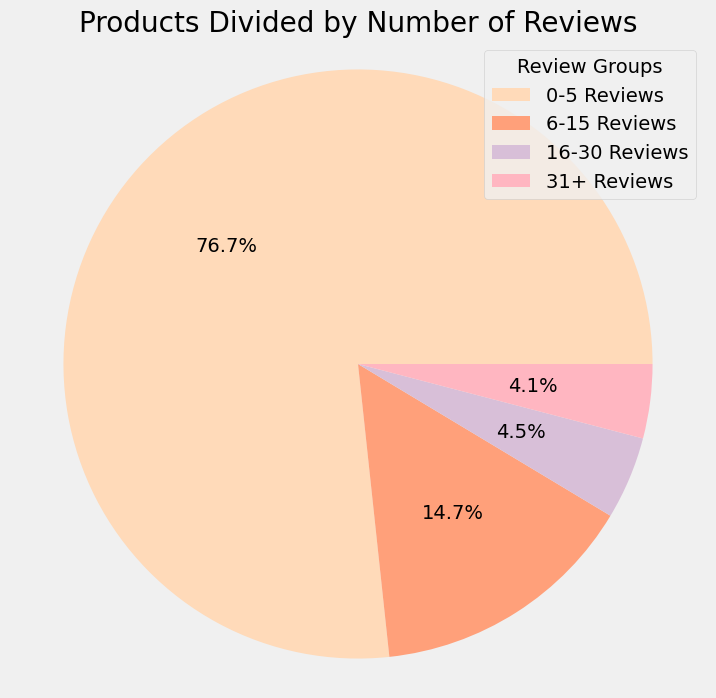

In [ ]:
# Define custom bins for the number of reviews
bins = [0, 5, 15, 30, float('inf')]  # Bins: 0-5, 6-15, 16-30, 31+
labels = ['0-5 Reviews', '6-15 Reviews', '16-30 Reviews', '31+ Reviews']  # Labels for each bin
ReviewGroup = pd.cut(total_reviews, bins=bins, labels=labels)

# Count the number of products in each group
group_counts = ReviewGroup.value_counts()

# Plotting the pie chart
colors = ['#FFDAB9', '#FFA07A', '#D8BFD8', '#FFB6C1']
plt.figure(figsize=(8, 8))  # Set the size of the plot
plt.pie(group_counts, autopct='%1.1f%%', colors=colors)
plt.title('Products Divided by Number of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# Adding a legend
plt.legend(title="Review Groups",labels = group_counts.index, loc="upper right", fontsize="medium")
plt.show()

# Sentiment Analysis

## Preprocessing Data

In [ ]:
def clean_text_nltk_stop_words(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # Perform POS tagging
    pos_tags = nltk.pos_tag(stripped)

    # Define stopwords to remove based on their POS tags
    stop_words = set(stopwords.words('english'))
    stop_words_pos = ['CC', 'CD', 'DT', 'EX', 'IN', 'LS', 'MD', 'PDT', 'POS', 'PRP', 'PRP$', 'RP', 'TO', 'UH', 'WDT', 'WP', 'WP$', 'WRB']

    # Remove stopwords based on their POS tags
    words_v2 = [word for word, tag in pos_tags if tag not in stop_words_pos and word.lower() not in stop_words]

    #Lemmatizing
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in words_v2])

    return text

In [ ]:
df['ProcessedText'] = df['Text'].apply(lambda x: clean_text_nltk_stop_words(x))

In [48]:
df_preprocessed['ProcessedText'] = df_preprocessed['ProcessedText'].apply(lambda x: str(x))

In [45]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [49]:
# Apply sentiment analysis to each review
df_preprocessed['Sentiment'] = df_preprocessed['ProcessedText'].apply(calculate_sentiment)

In [50]:
# Group by 'ProductId' and calculate the mean sentiment for each product
product_mean_sentiments = df_preprocessed.groupby('ProductId')['Sentiment'].mean().reset_index()
product_mean_sentiments.rename(columns={'Sentiment': 'Sentiment_mean'}, inplace=True)
df_preprocessed = pd.merge(df_preprocessed, product_mean_sentiments, on='ProductId', how='left', suffixes=('', '_mean'))

In [63]:
product_mean_sentiments

,ProductId,Sentiment_mean
0,0006641040,0.239109
1,141278509X,0.402381
2,2734888454,0.167361
3,2841233731,0.498095
4,7310172001,0.216138
...,...,...
72635,B009SMKESO,0.124479
72636,B009SR4OQ2,0.500000
72637,B009UUS05I,0.466667
72638,B009WSNWC4,0.316667


In [65]:
df_preprocessed['Sentiment_difference'] = df_preprocessed['Sentiment'] - df_preprocessed.groupby('ProductId')['Sentiment'].transform('mean')
print(df_preprocessed[['ProductId', 'Sentiment', 'Sentiment_mean', 'Sentiment_difference']])

         ProductId  Sentiment  Sentiment_mean  Sentiment_difference
0       B001E4KFG0   0.425000        0.425000              0.000000
1       B00813GRG4   0.216667        0.216667              0.000000
2       B000LQOCH0   0.187000        0.187000              0.000000
3       B000UA0QIQ   0.150000        0.150000              0.000000
4       B006K2ZZ7K   0.458333        0.345417              0.112917
...            ...        ...             ...                   ...
469160  B001EO7N10   0.420000        0.127555              0.292445
469161  B003S1WTCU  -0.208333       -0.208333              0.000000
469162  B004I613EE  -0.021875        0.249777             -0.271652
469163  B004I613EE   0.521429        0.249777              0.271652
469164  B001LR2CU2   0.106410        0.106410              0.000000

[469165 rows x 4 columns]


In [68]:
#Sort the DataFrame based on the absolute values of sentiment differences
sorted_df = df_preprocessed.loc[df_preprocessed.groupby('ProductId')['Sentiment_difference'].idxmax()]

# Display the DataFrame
print(sorted_df[['ProductId', 'Sentiment', 'Sentiment_mean', 'Sentiment_difference']])

         ProductId  Sentiment  Sentiment_mean  Sentiment_difference
125635  0006641040   1.000000        0.239109              0.760891
425478  141278509X   0.402381        0.402381              0.000000
20567   2734888454   0.500000        0.167361              0.332639
257002  2841233731   0.498095        0.498095              0.000000
142929  7310172001   0.866667        0.216138              0.650529
...            ...        ...             ...                   ...
187493  B009SMKESO   0.124479        0.124479              0.000000
183925  B009SR4OQ2   0.500000        0.500000              0.000000
274292  B009UUS05I   0.466667        0.466667              0.000000
4902    B009WSNWC4   0.316667        0.316667              0.000000
273525  B009WVB40S   0.299008        0.299008              0.000000

[72640 rows x 4 columns]


In [75]:
# Sort the DataFrame based on the absolute values of sentiment differences in descending order
sorted_reviews = df_preprocessed.sort_values(by='Sentiment_difference', ascending=False)

# Get the top 5 reviews
top5_reviews = sorted_reviews.head(5)

# Display the DataFrame
print(top5_reviews[['ProductId', 'Sentiment', 'Sentiment_mean', 'Sentiment_difference']])

         ProductId  Sentiment  Sentiment_mean  Sentiment_difference
356320  B0031SWUR4        1.0       -0.037198              1.037198
375590  B000MICPUI        1.0        0.039731              0.960269
326966  B000E1HW0G        1.0        0.060360              0.939640
340757  B0017M5V9A        1.0        0.074460              0.925540
386787  B000NCEHX6        1.0        0.079638              0.920362


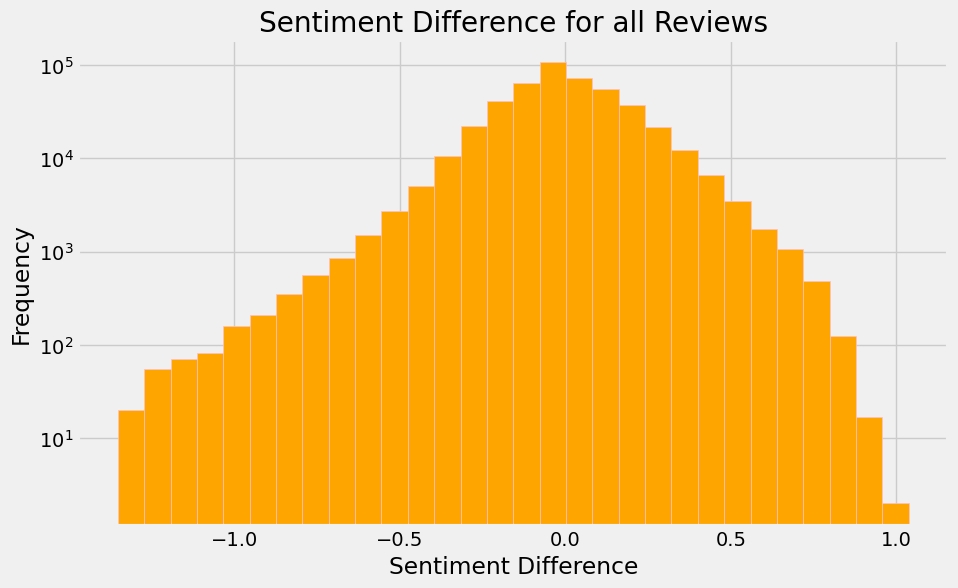

In [78]:
# Calculate sentiment difference for fake reviews
df_preprocessed['SentimentDifference'] = df_preprocessed.apply(lambda row: (row['Sentiment']) - row['Sentiment_mean'], axis=1)

# Plot the difference
plt.figure(figsize=(10, 6))
plt.hist(df_preprocessed['SentimentDifference'], bins=30, color='orange', edgecolor='pink')
plt.title('Sentiment Difference for all Reviews')
plt.xlabel('Sentiment Difference')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [70]:
import pandas as pd

# Assuming you have a DataFrame df with 'Score' and 'Sentiment' columns

# Specify the scores you are interested in (e.g., 1 to 5)
target_scores = [1, 2, 3, 4, 5]

# Filter the DataFrame based on the target scores
filtered_df = df_preprocessed[df_preprocessed['Score'].isin(target_scores)]

# Calculate the mean sentiment for each score group
mean_sentiment_by_score = filtered_df.groupby('Score')['Sentiment'].mean()

# Display the mean sentiment for each score group
print(mean_sentiment_by_score)


Score
1    0.017887
2    0.102647
3    0.170671
4    0.243015
5    0.309421
Name: Sentiment, dtype: float64


In [62]:
df_preprocessed.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length,Sentiment,Sentiment_mean,Sentiment_diff
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159,0.425000,0.425000,0.000000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135,0.216667,0.216667,0.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288,0.187000,0.187000,0.000000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133,0.150000,0.150000,0.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88,0.458333,0.345417,0.112917


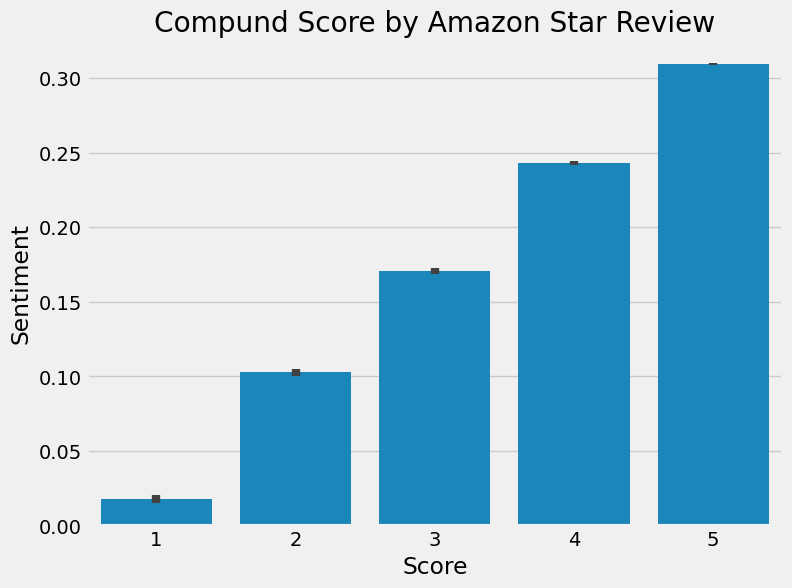

In [59]:
ax=sns.barplot(data=df_preprocessed, x="Score", y="Sentiment")
ax.set_title("Compund Score by Amazon Star Review")

plt.show()


In [95]:
df_preprocessed['Word_Count'] = df_preprocessed['ProcessedText'].apply(lambda x: len(x.split()))

In [96]:
df_preprocessed.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length,Sentiment,Sentiment_mean,Sentiment_diff,Sentiment_difference,SentimentDifference,Word_Count
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159,0.425000,0.425000,0.000000,0.000000,0.000000,22
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135,0.216667,0.216667,0.000000,0.000000,0.000000,18
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288,0.187000,0.187000,0.000000,0.000000,0.000000,39
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133,0.150000,0.150000,0.000000,0.000000,0.000000,18
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88,0.458333,0.345417,0.112917,0.112917,0.112917,13
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair taffy ordered pound bag taffy e...,264,0.333333,0.345417,-0.012083,-0.012083,-0.012083,35
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,saltwater taffy great flavor soft chewy candy...,202,0.210000,0.345417,-0.135417,-0.135417,-0.135417,26
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,taffy good soft chewy flavor amazing defini...,81,0.380000,0.345417,0.034583,0.034583,0.034583,10
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,right mostly sprouting cat eat grass love ro...,65,0.428571,0.428571,0.000000,0.000000,0.000000,10
9,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,nt know cactus tequila unique combination ingr...,448,0.229464,0.229464,0.000000,0.000000,0.000000,68


In [ ]:
df['Word_Count'].mean()

39.86953843530527

In [ ]:
df['Word_Count'].describe()

count    469165.000000
mean         39.869538
std          40.897583
min           0.000000
25%          16.000000
50%          27.000000
75%          48.000000
max        1911.000000
Name: Word_Count, dtype: float64

In [99]:
# Filter the DataFrame for the specific word count
review_with_desired_word_count = df_preprocessed[df_preprocessed['Word_Count'] == 1911]

# Display the review with the desired word count
print("Review with Word Count", 1911, ":")
print(review_with_desired_word_count['Text'].values[0])

Review with Word Count 1911 :
Fuzzy Wuzzy's Summary:<br />*** Somewhat recommended, with reservations and only lukewarm fuzzies.<br /><br />Positives:<br /><br />+ Not too expensive compared to other bottled water, although it is not cheap either.<br /><br />Negatives:<br /><br />- This bottled water product's labeling, product descriptions, and health claims are misleading.<br /><br />At first glance, this 1.5-liter bottle of water that I am reviewing looks like another one of the many varieties of bottled water on the market.  There are many kinds of bottled water: "spring water" produced from an underground formation where the groundwater naturally flows up to the Earth's surface, "artesian water" obtained from a well that taps into an underground aquifer, "mineral water" produced from a well or spring that naturally contains trace amounts of minerals that some people consider to provide health benefits, "ground/well water" produced from a well that tapes into an aquifer, "sparkling

## Fake Reviews Detection (part II)

In [ ]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity


def label_fake_food_review_criteria(text, product_mean_sentiment):
    # Define criteria
    #uses_superlatives = any(word in text.lower() for word in ["best", "amazing", "unbelievable"])
    unrealistic_detail = len(text.split()) > 96
    short_length_high_rating = len(text.split()) < 5 and "5" in text
    #repetitive_phrasing = any(text.count(phrase) > 1 for phrase in ["delicious", "tasty", "awesome"])


    # Compare sentiment with the mean sentiment of the product's reviews
    sentiment_difference = TextBlob(text).sentiment.polarity - product_mean_sentiment
    compared_to_mean_sentiment = sentiment_difference > 0.2  # Adjust the threshold as needed

    # Apply criteria to label reviews
    if (
        #compared_to_mean_sentiment
        (unrealistic_detail and compared_to_mean_sentiment) or
        (short_length_high_rating and compared_to_mean_sentiment) or
        compared_to_mean_sentiment
    ):
        return 1  # Fake
    else:
        return 0  # Genuine

  def label_fake_food_review(row):
    return label_fake_food_review_criteria(
        row['ProcessedText'],
        row['Sentiment_mean']
    )

The first function, *calculate_sentiment*, computes the polarity of each review. The second function screens between fakes reviews on different criteria. The third function applies the previous one to each row of the dataset.  

In [ ]:
# Apply sentiment analysis to each review
df['Sentiment'] = df['ProcessedText'].apply(calculate_sentiment)

In [ ]:
# Group by 'ProductId' and calculate the mean sentiment for each product
product_mean_sentiments = df.groupby('ProductId')['Sentiment'].mean().reset_index()
product_mean_sentiments.rename(columns={'Sentiment': 'Sentiment_mean'}, inplace=True)


In [ ]:
# Merge the mean sentiments back into the original dataset based on 'ProductId'
process_data_df = pd.merge(df, product_mean_sentiments, on='ProductId', how='left', suffixes=('', '_mean'))

In [ ]:
# Apply the label_fake_food_review function to each row
process_data_df['FakeReviewLabel'] = process_data_df.apply(label_fake_food_review, axis=1)

In [ ]:
fake_reviews_df = process_data_df[process_data_df['FakeReviewLabel'] == 1]
#fake_reviews_df[['ProductId', 'UserId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text', 'Sentiment', 'Sentiment_mean', 'FakeReviewLabel']].head()
fake_reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length,Word_Count,Sentiment,Sentiment_mean,FakeReviewLabel
12,14,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",2,2,4,1288915200,fresh and greasy!,good flavor! these came securely packed... the...,good flavor came securely packed fresh delicio...,65,9,0.580000,0.203508,1
15,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,love eating good watching tv looking movie sw...,104,17,0.462500,0.203508,1
41,43,B001EO5QW8,A16XFOYQSJREL7,Roger Pugliese,0,0,5,1287014400,Food-Great,I have McCann's Oatmeal every morning and by o...,mccann oatmeal morning ordering amazon able sa...,101,15,0.650000,0.315402,1
42,44,B001EO5QW8,A17DW6SUOC70DJ,Mother of 9,0,0,5,1255392000,Good Hot Breakfast,McCann's Oatmeal is a good quality choice. Ou...,mccann oatmeal good quality choice favorite a...,123,17,0.630000,0.315402,1
46,48,B001EO5QW8,A26AY1TFK8BQXQ,"kbogo ""shoelover""",1,2,3,1200096000,Mushy,"The flavors are good. However, I do not see a...",flavor good however see differce oaker oat b...,57,9,0.700000,0.315402,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469128,568418,B0000D16IP,A1SOL9F0I9D3A4,William M. Jacobs,2,4,4,1257897600,Great,This is the best brand of Mango Chutney that I...,best brand mango chutney able buy enjoy,40,7,0.633333,0.396667,1
469138,568428,B001FPT1WM,A7VLVCQJIROTF,"Lorraine ""DamnSwank""",1,1,5,1340323200,The search has ended!,I had been looking for the violet candy with t...,looking violet candy perfect balance sweet flo...,89,13,0.616667,0.271548,1
469139,568429,B001FPT1WM,A1YGG6T4YJZWC1,"bethany ""birds and more birds""",1,1,5,1340236800,very tasty,these are very pricey so i only enjoy them now...,pricey enjoy treat flavor wonderfull packaging...,133,20,0.625000,0.271548,1
469160,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,great sesame chicken good better resturants e...,83,12,0.420000,0.127555,1


In [80]:
# Assuming df_preprocessed is your DataFrame
selected_columns = ['ProductId', 'ProcessedText', 'Sentiment', 'Sentiment_mean']

# Use loc or iloc to select and print the desired columns
selected_df = fake_df.loc[:, selected_columns]

# Display the selected DataFrame
print(selected_df)

        ProductId                                      ProcessedText  \
0      B001GVISJM  good flavor came securely packed fresh delicio...   
1      B001GVISJM  love eating good watching tv looking movie  sw...   
2      B001EO5QW8  mccann oatmeal morning ordering amazon able sa...   
3      B001EO5QW8  mccann oatmeal good quality choice  favorite a...   
4      B001EO5QW8  flavor good  however  see differce oaker oat b...   
...           ...                                                ...   
64143  B0000D16IP           best brand mango chutney able buy enjoy    
64144  B001FPT1WM  looking violet candy perfect balance sweet flo...   
64145  B001FPT1WM  pricey enjoy treat flavor wonderfull packaging...   
64146  B001EO7N10  great sesame chicken  good better resturants e...   
64147  B004I613EE  best treat training rewarding dog good groomin...   

       Sentiment  Sentiment_mean  
0       0.580000        0.203508  
1       0.462500        0.203508  
2       0.650000        0.3154

In [91]:
fake_df['SentimentDifference'] = fake_df.apply(lambda row: (row['Sentiment']) - row['Sentiment_mean'], axis=1)

# Find the index of the row with the highest sentiment difference
max_sentiment_difference_index = fake_df['SentimentDifference'].idxmax()

# Extract the processed text using the index
processed_text_highest_difference = fake_df.loc[max_sentiment_difference_index, 'Text']

# Display the processed text
print("Processed Text from Review with the Highest Sentiment Difference:")
print(processed_text_highest_difference)

Processed Text from Review with the Highest Sentiment Difference:
I thought this was the cutest thing. I call my friend Gummy Bear so it was the perfect Christmas gift.


In [93]:
# Filter the DataFrame for the specific ProductID
reviews_for_specific_product = df_preprocessed[df_preprocessed['ProductId'] == 'B0031SWUR4']

# Display all reviews for the specific ProductID
print("All Reviews for ProductID:", 'B0031SWUR4')
print(reviews_for_specific_product[['Text']])

All Reviews for ProductID: B0031SWUR4
                                                     Text
356314  These are really cute bears but they taste hor...
356315  These giant gummy bears are horrendous! They t...
356316  I've purchased two of these from two different...
356317  Horrible, melted slimy and tasted bad.  Gave t...
356318  I was very disappointed when this arrived in t...
356319  My hubby loves Gummi Bears so I thought this w...
356320  I thought this was the cutest thing. I call my...


In [94]:
text_at_specific_index = df_preprocessed.loc[356315, 'Text']

# Display the text
print("Text at Index", 356315, ":", text_at_specific_index)

Text at Index 356315 : These giant gummy bears are horrendous! They taste like ****! They smell just as bad! Note in the picture that the blue raspberry bear is GREEN!  I only made it a couple of bites into my blue raspberry one. My husband thought it was awful too.


### Saving Reviews Data With Labels (fake or not)

In [ ]:
process_data_df.to_csv('final_process_data.csv', index=False)

In [ ]:
process_data_df['FakeReviewLabel'].sum()

### Saving Genuine Reviews Data

In [ ]:
genuine_df = process_data_df[process_data_df['FakeReviewLabel'] == 0]

In [ ]:
genuine_df.drop(columns=['FakeReviewLabel','Review_Length'], inplace=True)

In [ ]:
genuine_df.reset_index(drop=True, inplace=True)

In [ ]:
genuine_df.to_csv('genuine_df.csv', index=False)

### Saving Fake Reviews Data

In [ ]:
fake_only_df = process_data_df[process_data_df['FakeReviewLabel'] == 1]

In [ ]:
fake_only_df.drop(columns=['FakeReviewLabel','Review_Length'], inplace=True)

In [ ]:
fake_only_df.reset_index(drop=True, inplace=True)

In [ ]:
fake_only_df.to_csv('fake_df.csv', index=False)

## Dealing With Class Imbalance

In [ ]:
genuine_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/final_process_data.csv')

In [ ]:
genuine_df = genuine_df.dropna()

In [ ]:
class_distributions = genuine_df[['Score','Sentiment']].groupby('Score').count()

In [ ]:
class_distributions = class_distributions.reset_index()

In [ ]:
class_distributions

,Score,Sentiment
0,1,41993
1,2,24888
2,3,36422
3,4,69216
4,5,296645


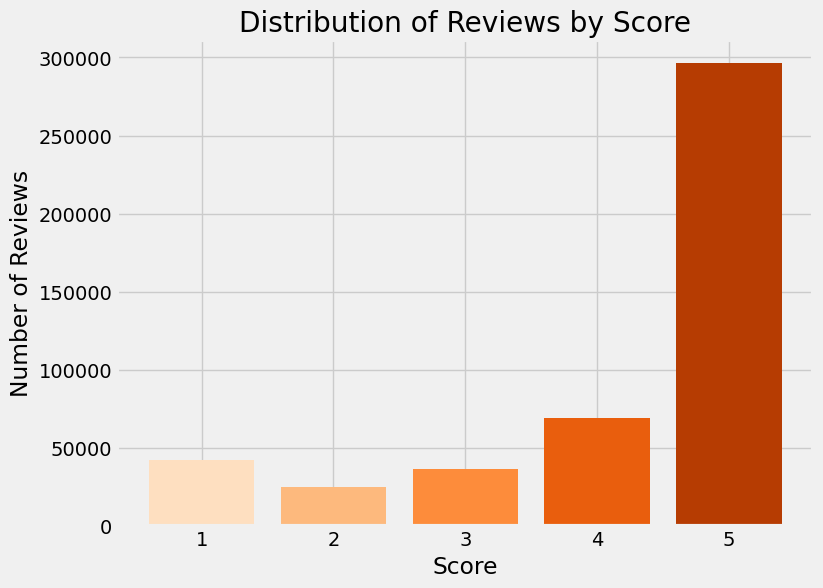

In [ ]:
colors = sns.color_palette("Oranges", 5)
plt.figure(figsize=(8, 6))
plt.bar(class_distributions['Score'],class_distributions['Sentiment'], color=colors)
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Score')
plt.xticks(range(1, 6))
plt.show()

In [ ]:
X = genuine_df['Sentiment']
y = genuine_df['Score']

In [ ]:
smote = SMOTE(random_state = 42)

In [ ]:
X_df = X.to_frame()  # Assuming X is the feature Series
y_df = y.to_frame()

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_df, y_df)

# Create a DataFrame with the balanced data
balanced_df = pd.DataFrame(X_resampled, columns=['Sentiment'])  # Assuming your text features are in a column named 'Sentiment'
balanced_df['Score'] = y_resampled


In [ ]:
balanced_df

,Sentiment,Score
0,0.425000,5
1,0.216667,1
2,0.187000,4
3,0.150000,2
4,0.458333,5
...,...,...
1483220,0.065278,4
1483221,0.214582,4
1483222,0.190000,4
1483223,0.238889,4


In [ ]:
class_distributions_smote = balanced_df[['Score','Sentiment']].groupby('Score').count()

In [ ]:
class_distributions_smote = class_distributions_smote.reset_index()

In [ ]:
class_distributions_smote

,Score,Sentiment
0,1,296645
1,2,296645
2,3,296645
3,4,296645
4,5,296645


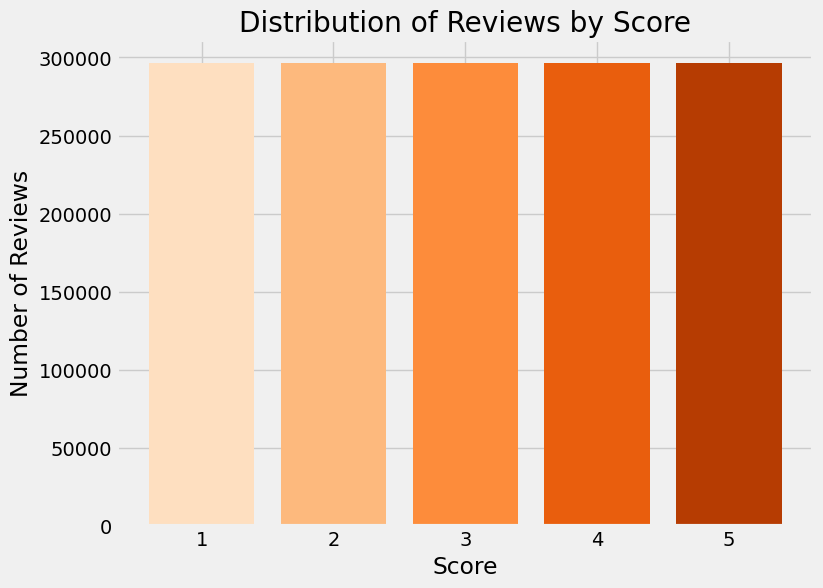

In [ ]:
colors = sns.color_palette("Oranges", 5)
plt.figure(figsize=(8, 6))
plt.bar(class_distributions_smote['Score'],class_distributions_smote['Sentiment'], color=colors)
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Score')
plt.xticks(range(1, 6))
plt.show()

In [ ]:
balanced_df.head()

,Sentiment,Score
0,0.425000,5
1,0.216667,1
2,0.187000,4
3,0.150000,2
4,0.458333,5


In [ ]:
balanced_df.to_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/balanced_for_classification.csv')

In [ ]:
X_resampled = balanced_df['Sentiment']
y_resampled = balanced_df['Score']

### Adding new variable to see how users express positive feelings

In [ ]:
medians = genuine_df[['UserId', 'Score', 'Sentiment']].groupby('UserId').median()

In [ ]:
medians = medians.reset_index()

In [ ]:
medians['Ratio'] = medians['Sentiment']/medians['Score']

In [ ]:
medians

,UserId,Score,Sentiment,Ratio
0,#oc-R103C0QSV1DF5E,5.0,0.311458,0.062292
1,#oc-R109MU5OBBZ59U,5.0,0.200000,0.040000
2,#oc-R10LT57ZGIB140,3.0,-0.100000,-0.033333
3,#oc-R10UA029WVWIUI,1.0,0.122449,0.122449
4,#oc-R115TNMSPFT9I7,2.0,-0.157407,-0.078704
...,...,...,...,...
210311,AZZV61COVM8CA,5.0,0.109273,0.021855
210312,AZZV9PDNMCOZW,5.0,0.202500,0.040500
210313,AZZVNIMTTMJH6,5.0,0.301563,0.060313
210314,AZZY649VYAHQS,5.0,0.177143,0.035429


In [ ]:
merged_df = pd.merge(genuine_df, medians[['UserId', 'Ratio']], on='UserId', how='left')


In [ ]:
merged_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Word_Count,Sentiment,Sentiment_mean,Ratio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,22,0.425000,0.425000,0.085000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,18,0.216667,0.216667,0.216667
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,39,0.187000,0.187000,0.100000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,18,0.150000,0.150000,0.075000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,13,0.458333,0.345417,0.086833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405011,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex...",hoping msg taste extremely good make toasted ...,67,0.253846,0.127555,0.019405
405012,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...,complaint much nt use huge amount spice gave...,12,0.200000,0.127555,0.020833
405013,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,disappointed flavor chocolate note especially...,22,-0.208333,-0.208333,0.065476
405014,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",star small give training session tried train...,34,-0.021875,0.249777,-0.004375


In [ ]:
X= merged_df[['Sentiment', 'Ratio']]
y = merged_df['Score']

In [ ]:
len(X)

405016

In [ ]:
X

,Sentiment,Ratio
0,0.425000,0.085000
1,0.216667,0.216667
2,0.187000,0.100000
3,0.150000,0.075000
4,0.458333,0.086833
...,...,...
405011,0.253846,0.019405
405012,0.200000,0.020833
405013,-0.208333,0.065476
405014,-0.021875,-0.004375


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=42)

## Other Sentiment Scoring

In [ ]:
genuine_df[['Score','Sentiment']].groupby('Score').describe()

Sentiment                                                            
          count      mean       std  min       25%       50%       75%  max
Score                                                                      
1       41993.0  0.017887  0.247480 -1.0 -0.103472  0.025000  0.161538  1.0
2       24888.0  0.102647  0.208809 -1.0 -0.000694  0.102500  0.218676  1.0
3       36422.0  0.170671  0.189772 -1.0  0.058222  0.163306  0.275000  1.0
4       69216.0  0.243015  0.189086 -1.0  0.124181  0.229167  0.350000  1.0
5      296645.0  0.309421  0.206096 -1.0  0.175000  0.297230  0.433333  1.0

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

def get_sentiment_class(preprocessed_text):
    # Initialize the VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Compute sentiment scores using VADER
    sentiment_scores = sid.polarity_scores(preprocessed_text)

    # Map polarity scores to five classes
    if sentiment_scores['compound'] >= 0.6:
        sentiment_class = 5
    elif sentiment_scores['compound'] >= 0.2:
        sentiment_class = 4
    elif sentiment_scores['compound'] >= -0.2:
        sentiment_class = 3
    elif sentiment_scores['compound'] >= -0.6:
        sentiment_class = 2
    else:
        sentiment_class = 1

    return sentiment_class

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
genuine_df['NewSentiment'] = genuine_df['ProcessedText'].apply(lambda x: get_sentiment_class(str(x)))

In [ ]:
genuine_df.to_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/new_scores_vader')

In [ ]:
scores_pred = genuine_df['NewSentiment']

In [ ]:
outcomes = (scores_pred == genuine_df['Score'])

In [ ]:
true_count = outcomes.value_counts()[True]
false_count = outcomes.value_counts()[False]
print("Number of True values:", true_count)
print("Number of False values:", false_count)
print("Accuracy:", true_count/(true_count+false_count))

Number of True values: 273000
Number of False values: 196164
Accuracy: 0.5818860782157199


## Logistic Regression Classification

In [ ]:
X = balanced_df['Sentiment']
y= balanced_df['Score']

In [ ]:
X_reshaped = X.values.reshape(-1,1)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_reshaped, y, test_size=0.25, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Example for score prediction
model_score = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=100, random_state=42, n_jobs=-1)
model_score.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model_score.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           1       0.36      0.64      0.46     74161
           2       0.23      0.11      0.15     74161
           3       0.24      0.13      0.17     74162
           4       0.25      0.12      0.16     74161
           5       0.35      0.61      0.45     74162

    accuracy                           0.32    370807
   macro avg       0.29      0.32      0.28    370807
weighted avg       0.29      0.32      0.28    370807



## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_score = RandomForestClassifier()
model_score.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Reshape X_test to make it a 2D array
X_test_reshaped = X_test.values.reshape(-1, 1)

# Make predictions
y_pred = model_score.predict(X_test_reshaped)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           1       0.46      0.57      0.51     61317
           2       0.42      0.41      0.41     61316
           3       0.46      0.35      0.40     61317
           4       0.47      0.35      0.40     61317
           5       0.42      0.54      0.48     61316

    accuracy                           0.44    306583
   macro avg       0.45      0.44      0.44    306583
weighted avg       0.45      0.44      0.44    306583



In [ ]:
X_test_reshaped

array([[ 0.24200265],
       [ 0.26111111],
       [-0.46666667],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.22357343]])

# Dealing with Class Imbalance during the training

### Random Forest

In [ ]:
genuine_df = genuine_df.dropna()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'ProcessedText' is your text data column and 'Score' is the target
X = genuine_df['ProcessedText']
y = genuine_df['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max features as needed

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Calculate class weights based on the training set
class_weights = dict(1 / y_train.value_counts(normalize=True))

# Create a RandomForestClassifier with class weights
clf = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Train the model
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


# OTHER TO ADJ

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(genuine_df['Sentiment'],
                              genuine_df['Score'], stratify=genuine_df['Score'], random_state=42
)

In [ ]:
textclassifier = Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=42))
])

In [ ]:
fit = textclassifier.fit(X_train, y_train)

In [ ]:
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Now, you can apply SMOTE to the numerical features
X_train_balanced, y_train_balanced = textclassifier.named_steps['smote'].fit_resample(X_tfidf, y)

# Sentiment Analysis (micaela)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/filtered_data.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Preprocessing text

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

### Preprocessing text using SpaCy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocess_text(text):
    # Remove punctuation and convert text to lowercase
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize the text
    doc = nlp(text)

    # Remove stopwords and non-alphabetic tokens
    tokens = [token.text for token in doc if token.text.isalpha() and token.text not in STOP_WORDS]

    # Lemmatize tokens
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    # Return preprocessed text as a string
    return ' '.join(lemmatized_tokens)

In [ ]:
def clean_text_nltk_stop_words(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # Perform POS tagging
    pos_tags = nltk.pos_tag(stripped)

    # Define stopwords to remove based on their POS tags
    stop_words = set(stopwords.words('english'))
    stop_words_pos = ['CC', 'CD', 'DT', 'EX', 'IN', 'LS', 'MD', 'PDT', 'POS', 'PRP', 'PRP$', 'RP', 'TO', 'UH', 'WDT', 'WP', 'WP$', 'WRB']

    # Remove stopwords based on their POS tags
    words_v2 = [word for word, tag in pos_tags if tag not in stop_words_pos and word.lower() not in stop_words]

    #Lemmatizing
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in words_v2])

    return text

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/preprocessed_data2.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProcessedText,Review_Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,159
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,135
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection century light pillowy citrus gela...,288
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,133
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy...,88


In [ ]:
df['ProcessedText'][57377]

'                                                          br   update  read update first  thanks   june august    br                                                             br     actively anyway   cat    normal   eat anything  kidney disease  crfckd  accompanying reduced appetite  one picky  weird  taste  process trying find appetite stimulant momcat  crfckd  tried several product others  kid  well br   result le scientific  definitive  survey   br    br   drsfoster  smith shrimp snappies treat  ground powder       refused  br   freezedried powder  prowl ziwi peak                effect   m picky  ate  br   seafood juice  tuna  oyster  sardine  etc                 effect    ate  br   dry  ground powder  cat food  halo  evo  blue fuffalo  etc       effect  ditto acceptance  br   canned cat food  gourmet brand  renal diet              ditto  br   hairball tube lube  usual suspect  cat grass              ditto  br   mark  chappells de furrums treat                   ditto  br   calmi

In [ ]:
df['ProcessedText'] = df['ProcessedText'].apply(lambda x: (str(x)))

In [ ]:
df['Word_count'] = df['ProcessedText'].apply(lambda x: len(x.split()))

In [ ]:
df['Word_count'].describe()

count    469165.000000
mean         39.869538
std          40.897583
min           0.000000
25%          16.000000
50%          27.000000
75%          48.000000
max        1911.000000
Name: Word_count, dtype: float64

## Class imbalances

In [ ]:
class_distributions = df[['Score','ProcessedText']].groupby('Score').count()

In [ ]:
class_distributions = class_distributions.reset_index()

In [ ]:
class_distributions

,Score,ProcessedText
0,1,41994
1,2,24888
2,3,36422
3,4,69216
4,5,296645


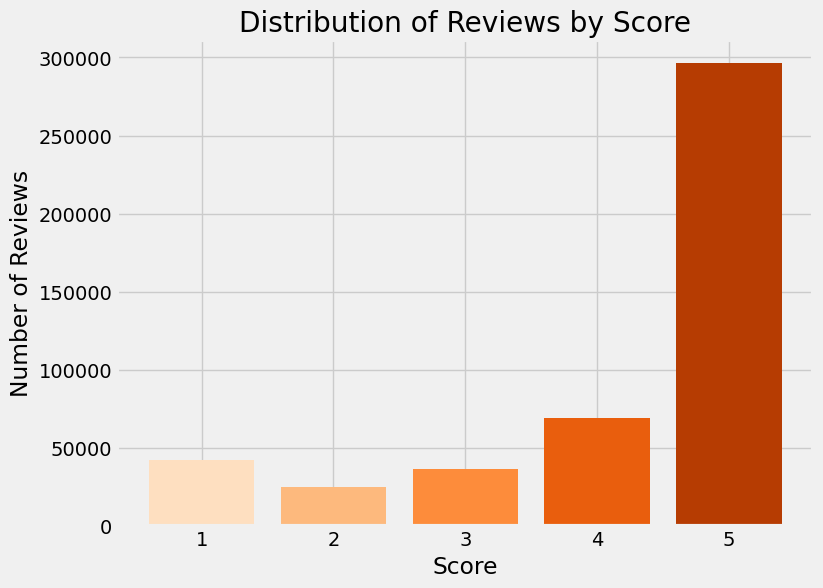

In [ ]:
colors = sns.color_palette("Oranges", 5)
plt.figure(figsize=(8, 6))
plt.bar(class_distributions['Score'],class_distributions['ProcessedText'], color=colors)
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Score')
plt.xticks(range(1, 6))
plt.show()

In [ ]:
# Separate features and target variable
X = df[['ProcessedText']]  # Assuming 'Score' is the feature
y = df['Score']  # Assuming 'ProcessedText' is the target

# Initialize SMOTE
smote = SMOTE()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # adjust max feattures here

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['ProcessedText'])

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

resampled_df = pd.DataFrame(X_resampled, columns=['Score'])
resampled_df['ProcessedText'] = y_resampled

print(resampled_df['Score'].value_counts())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

## CountVectorizer Scores

In [ ]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

### Naive Bayes

In [ ]:
# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

In [ ]:
metrics.f1_score(y_test,y_pred_class)